In [2]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [3]:

root = Path("nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/")

In [4]:
list(root.parts)

['nifti',
 'FDG-PET-CT-Lesions',
 'PETCT_0011f3deaf',
 '03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445']

In [5]:
list(root.glob("*"))

[WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CT.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CTres.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/PET.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SEG.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV.nii.gz')]

In [6]:
PatientCT_Path = list(root.glob("CT*"))[0] 
PatientCTRes_Path = list(root.glob("CTres*"))[0] 
PatientPET_Path = list(root.glob("PET*"))[0] 
PatientSEG_Path = list(root.glob("SEG*"))[0] 
PatientSUV_Path = list(root.glob("SUV*"))[0] 

In [7]:
data = nib.load(PatientCT_Path)
ct = data.get_fdata()
data = nib.load(PatientCTRes_Path)
ctres = data.get_fdata()
data = nib.load(PatientPET_Path)
pet = data.get_fdata()
data = nib.load(PatientSEG_Path)
seg = data.get_fdata()
data = nib.load(PatientSUV_Path)
suv = data.get_fdata()

In [8]:
print("Shape:", ct.shape)
print("Data type:", ct.dtype)

Shape: (512, 512, 391)
Data type: float64


<IPython.core.display.Javascript object>


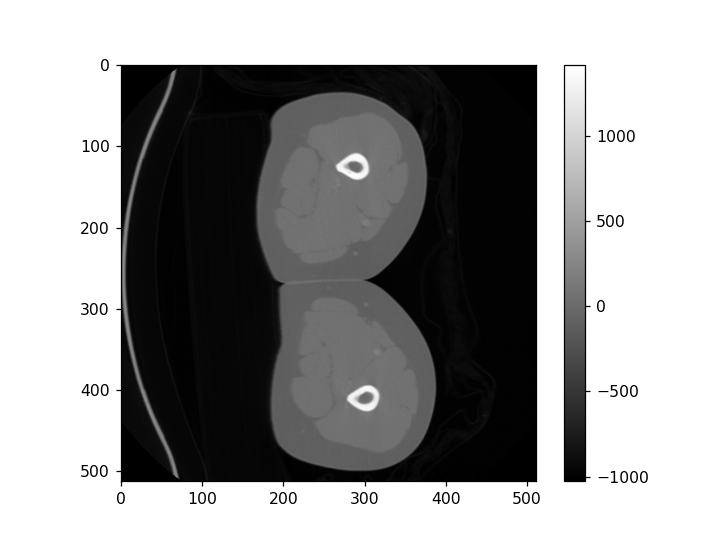

In [9]:
plt.imshow(ct[:, :, 1], cmap='gray')
plt.colorbar()
plt.show()

In [16]:
import math
num_slices = 391  # Example number of slices
num_rows = math.ceil(math.sqrt(num_slices))
num_columns = math.ceil(num_slices / num_rows)

<IPython.core.display.Javascript object>


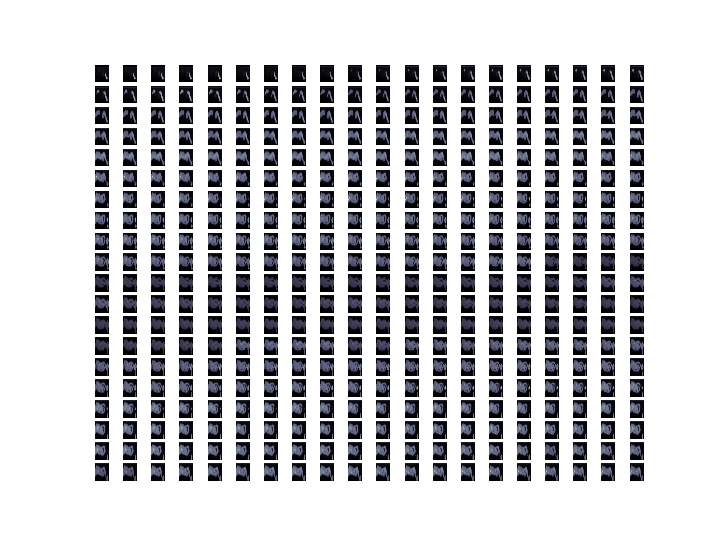

In [19]:
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns)

for i, ax in enumerate(axes.flat):
    ax.imshow(ct[i, :, :], cmap='bone')
    ax.axis('off')

plt.show()

<IPython.core.display.Javascript object>


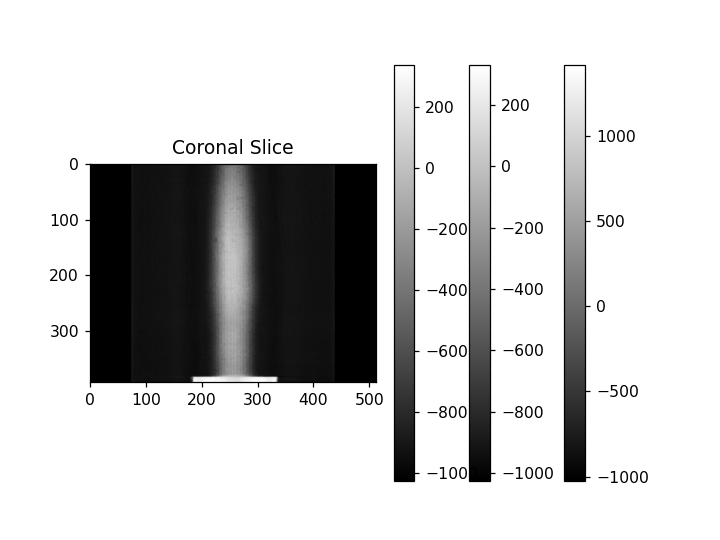

In [22]:
import matplotlib.pyplot as plt

# Display axial slice
plt.imshow(ct[:, :, 0], cmap='gray')
plt.title('Axial Slice')
plt.colorbar()
plt.show()



In [23]:
# Display sagittal slice
plt.imshow(ct[0, :, :].T, cmap='gray')
plt.title('Sagittal Slice')
plt.colorbar()
plt.show()


In [24]:

# Display coronal slice
plt.imshow(ct[:, 0, :].T, cmap='gray')
plt.title('Coronal Slice')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


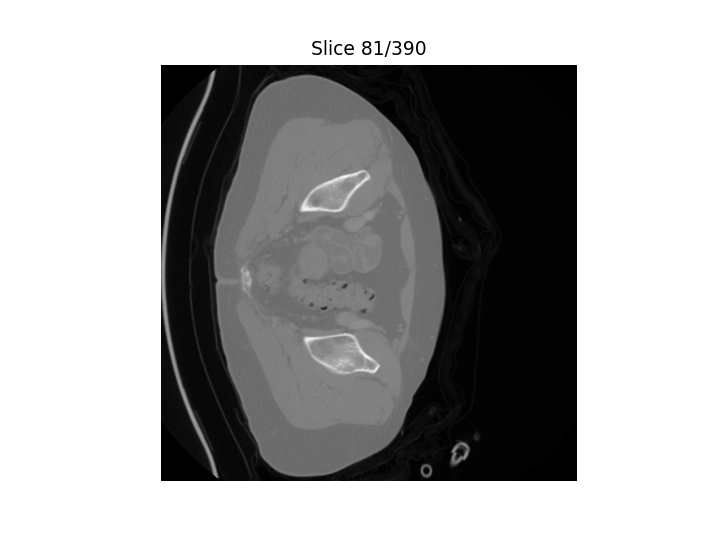

In [31]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

def update(frame):
    ax.imshow(ct[:, :, frame], cmap='gray')
    ax.set_title(f"Slice {frame}/{ct.shape[2]-1}")
    ax.axis('off')

animation = FuncAnimation(fig, update, frames=ct.shape[2], interval=50)
plt.show()

<IPython.core.display.Javascript object>


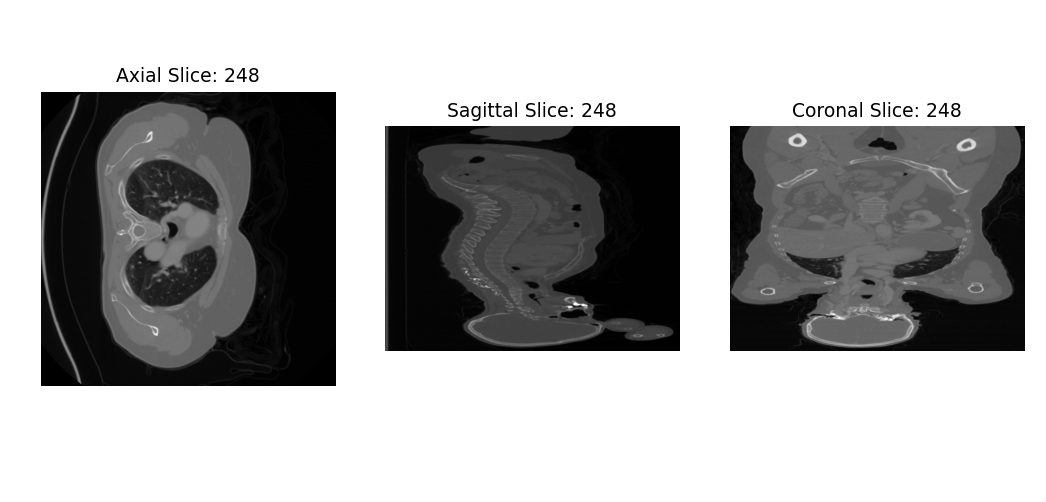

In [32]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

def update(frame):
    # Axial Slice
    ax[0].imshow(ct[:, :, frame], cmap='gray')
    ax[0].set_title(f"Axial Slice: {frame}")
    ax[0].axis('off')

    # Sagittal Slice
    sagittal_slice = frame
    ax[1].imshow(ct[sagittal_slice, :, :].T, cmap='gray')
    ax[1].set_title(f"Sagittal Slice: {sagittal_slice}")
    ax[1].axis('off')

    # Coronal Slice
    coronal_slice = frame
    ax[2].imshow(ct[:, coronal_slice, :].T, cmap='gray')
    ax[2].set_title(f"Coronal Slice: {coronal_slice}")
    ax[2].axis('off')

animation = FuncAnimation(fig, update, frames=ct.shape[2], interval=50)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


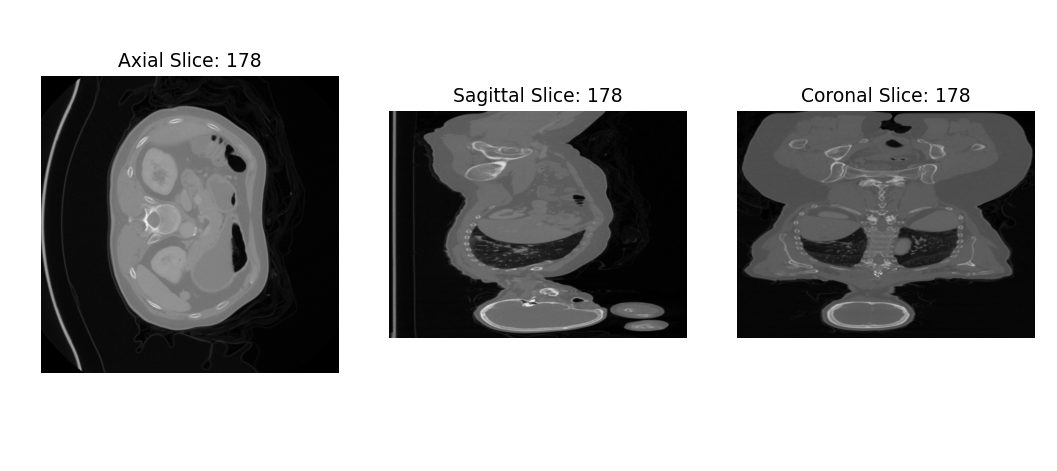

In [34]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

def update(frame):
    # Axial Slice
    ax[0].imshow(ct[:, :, frame], cmap='gray')
    ax[0].set_title(f"Axial Slice: {frame}")
    ax[0].axis('off')

    # Sagittal Slice
    sagittal_slice = frame
    sagittal_data = np.flipud(ct[sagittal_slice, :, :].T)
    ax[1].imshow(sagittal_data, cmap='gray', origin='lower')
    ax[1].set_title(f"Sagittal Slice: {sagittal_slice}")
    ax[1].axis('off')

    # Coronal Slice
    coronal_slice = frame
    coronal_data = np.flipud(ct[:, coronal_slice, :].T)
    ax[2].imshow(coronal_data, cmap='gray', origin='lower')
    ax[2].set_title(f"Coronal Slice: {coronal_slice}")
    ax[2].axis('off')

animation = FuncAnimation(fig, update, frames=ct.shape[2], interval=50)
plt.tight_layout()
plt.show()
